[Veri Kümesi Kaynak Adresi](https://ieee-dataport.org/documents/cyber-security-modbus-ics-dataset)

Bu Veri Kümesinde TCP haberleşmesinde ki ataklar yer almaktadır. Aşağıda Status sütununda ki atak türleri verilmiştir.
0.  Normal
1.  MITM
2.  QueryFlooding
3.  Ping Flood DDoS
4.  TCP SYN Flood DDos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import warnings # gereksiz uyarıları da kapatalım
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/drive/MyDrive/CPS/Modbus RTU SCADA/VeriKümesiYeni/NewModBusTestDataSet_Buyuk.csv')

In [3]:
df.drop(['Unnamed: 0'], axis = 1, inplace= True) # gereksiz bir sütun oluştu onu sildik
df.head()

,Port A,Port B,Packets,Bytes,Packets A → B,Bytes A → B,Packets B → A,Bytes B → A,Rel Start,Duration,Bits/s A → B,Bits/s B → A,Status
0,49499,502,17241,1212789,11490,723954,5751,488835,0.000000e+00,1.799593e+09,3.218302e+16,2.173092e+14,0
1,502,51801,24,1440,12,720,12,720,3.192345e+07,1.650023e+09,3.490861e+14,3.490861e+14,0
2,52515,502,6,360,2,120,4,240,5.058220e-01,2.027600e-02,4.734662e+15,9.469323e+15,0
3,52516,502,25,1506,17,1020,8,486,1.956025e+06,1.470137e+16,5.550503e+15,2.644651e+16,0
4,52517,502,25,1506,17,1020,8,486,4.856039e+06,1.470166e+16,5.550394e+15,2.644599e+16,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224826 entries, 0 to 224825
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Port A         224826 non-null  int64  
 1   Port B         224826 non-null  int64  
 2   Packets        224826 non-null  int64  
 3   Bytes          224826 non-null  int64  
 4   Packets A → B  224826 non-null  int64  
 5   Bytes A → B    224826 non-null  int64  
 6   Packets B → A  224826 non-null  int64  
 7   Bytes B → A    224826 non-null  int64  
 8   Rel Start      224826 non-null  float64
 9   Duration       224826 non-null  float64
 10  Bits/s A → B   224826 non-null  float64
 11  Bits/s B → A   224826 non-null  float64
 12  Status         224826 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 22.3 MB


In [5]:
df[df["Status"]==0].count() # Normal

Port A           9326
Port B           9326
Packets          9326
Bytes            9326
Packets A → B    9326
Bytes A → B      9326
Packets B → A    9326
Bytes B → A      9326
Rel Start        9326
Duration         9326
Bits/s A → B     9326
Bits/s B → A     9326
Status           9326
dtype: int64

In [6]:
df[df["Status"]==1].count() # MITM

Port A           34811
Port B           34811
Packets          34811
Bytes            34811
Packets A → B    34811
Bytes A → B      34811
Packets B → A    34811
Bytes B → A      34811
Rel Start        34811
Duration         34811
Bits/s A → B     34811
Bits/s B → A     34811
Status           34811
dtype: int64

In [7]:
df[df["Status"]==2].count() # Query Flooding

Port A           61470
Port B           61470
Packets          61470
Bytes            61470
Packets A → B    61470
Bytes A → B      61470
Packets B → A    61470
Bytes B → A      61470
Rel Start        61470
Duration         61470
Bits/s A → B     61470
Bits/s B → A     61470
Status           61470
dtype: int64

In [8]:
df[df["Status"]==3].count() # Ping Flood DDoS

Port A           60406
Port B           60406
Packets          60406
Bytes            60406
Packets A → B    60406
Bytes A → B      60406
Packets B → A    60406
Bytes B → A      60406
Rel Start        60406
Duration         60406
Bits/s A → B     60406
Bits/s B → A     60406
Status           60406
dtype: int64

In [9]:
df[df["Status"]==4].count() # SYN Flood DDoS

Port A           58813
Port B           58813
Packets          58813
Bytes            58813
Packets A → B    58813
Bytes A → B      58813
Packets B → A    58813
Bytes B → A      58813
Rel Start        58813
Duration         58813
Bits/s A → B     58813
Bits/s B → A     58813
Status           58813
dtype: int64

In [10]:
df = df.reset_index()
del df['index']
df.head()

,Port A,Port B,Packets,Bytes,Packets A → B,Bytes A → B,Packets B → A,Bytes B → A,Rel Start,Duration,Bits/s A → B,Bits/s B → A,Status
0,49499,502,17241,1212789,11490,723954,5751,488835,0.000000e+00,1.799593e+09,3.218302e+16,2.173092e+14,0
1,502,51801,24,1440,12,720,12,720,3.192345e+07,1.650023e+09,3.490861e+14,3.490861e+14,0
2,52515,502,6,360,2,120,4,240,5.058220e-01,2.027600e-02,4.734662e+15,9.469323e+15,0
3,52516,502,25,1506,17,1020,8,486,1.956025e+06,1.470137e+16,5.550503e+15,2.644651e+16,0
4,52517,502,25,1506,17,1020,8,486,4.856039e+06,1.470166e+16,5.550394e+15,2.644599e+16,0


In [11]:
df_min_max_scaled = df.copy()

sutunListe = df_min_max_scaled.columns.values.tolist() # sütun listesini aldık ve bir liste yaptık
sutunListe.pop() #son sütun Target listeden sildik zaten 0 ve 1 değerleri var
for sutun in sutunListe:
  df_min_max_scaled[sutun] = (df_min_max_scaled[sutun] - df_min_max_scaled[sutun].min()) / (df_min_max_scaled[sutun].max() - df_min_max_scaled[sutun].min())

In [12]:
df_min_max_scaled.head()

,Port A,Port B,Packets,Bytes,Packets A → B,Bytes A → B,Packets B → A,Bytes B → A,Rel Start,Duration,Bits/s A → B,Bits/s B → A,Status
0,0.756359,0.008385,0.043991,0.043986,0.044006,0.044002,0.043960,0.043961,0.000000e+00,2.569858e-08,0.394654,0.002658,0
1,0.007353,0.865225,0.000059,0.000050,0.000042,0.000040,0.000092,0.000065,4.799358e-10,2.356269e-08,0.004281,0.004269,0
2,0.802464,0.008385,0.000013,0.000011,0.000004,0.000004,0.000031,0.000022,7.604507e-18,2.895457e-19,0.058060,0.115804,0
3,0.802480,0.008385,0.000061,0.000052,0.000061,0.000058,0.000061,0.000044,2.940680e-11,2.099388e-01,0.068065,0.323423,0
4,0.802495,0.008385,0.000061,0.000052,0.000061,0.000058,0.000061,0.000044,7.300549e-11,2.099429e-01,0.068063,0.323417,0


In [ ]:
# Hedef sütunu ayırma
X = df_min_max_scaled.iloc[:, :-1]
y = df_min_max_scaled.iloc[:, -1]

In [ ]:
# Hedef sütunu kategorik değişkene dönüştürme
y = to_categorical(y)

In [ ]:
# Eğitim ve test verilerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=59)

In [ ]:
X_train.shape[1] # Eğitilecek sütun sayısı

12

In [ ]:
y_train.shape[1] # Hedef sütün kategorik hali

5

In [ ]:
# Model oluşturma
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Modeli derleme
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Özeti
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               6656      
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 139,269
Trainable params: 139,269
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Modeli eğitme
history = model.fit(X_train, y_train, epochs=25, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/25
1406/1406 [==============================] - 7s 4ms/step - loss: 0.8634 - accuracy: 0.6245 - val_loss: 0.7472 - val_accuracy: 0.6620
Epoch 2/25
1406/1406 [==============================] - 6s 5ms/step - loss: 0.7147 - accuracy: 0.6773 - val_loss: 0.6890 - val_accuracy: 0.6887
Epoch 3/25
1406/1406 [==============================] - 5s 4ms/step - loss: 0.6703 - accuracy: 0.6913 - val_loss: 0.6704 - val_accuracy: 0.6912
Epoch 4/25
1406/1406 [==============================] - 6s 4ms/step - loss: 0.6380 - accuracy: 0.7063 - val_loss: 0.6226 - val_accuracy: 0.7143
Epoch 5/25
1406/1406 [==============================] - 6s 4ms/step - loss: 0.6122 - accuracy: 0.7182 - val_loss: 0.6050 - val_accuracy: 0.7230
Epoch 6/25
1406/1406 [==============================] - 6s 4ms/step - loss: 0.5980 - accuracy: 0.7232 - val_loss: 0.5921 - val_accuracy: 0.7263
Epoch 7/25
1406/1406 [==============================] - 7s 5ms/step - loss: 0.5908 - accuracy: 0.7253 - val_loss: 0.5888 - val_accuracy:

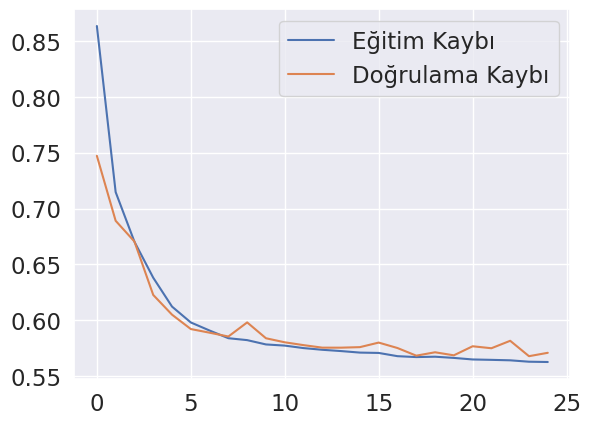

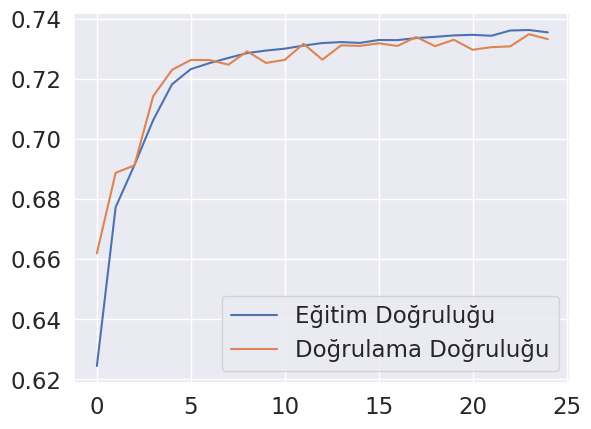

In [ ]:
# Eğitim kaybı ve doğruluğu
train_loss = history.history['loss']
train_acc = history.history['accuracy']

# Doğrulama kaybı ve doğruluğu
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Kayıp grafiği
plt.plot(train_loss, label='Eğitim Kaybı')
plt.plot(val_loss, label='Doğrulama Kaybı')
plt.legend()
plt.show()

# Doğruluk grafiği
plt.plot(train_acc, label='Eğitim Doğruluğu')
plt.plot(val_acc, label='Doğrulama Doğruluğu')
plt.legend()
plt.show()

In [ ]:
# Modeli değerlendirme
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

1406/1406 [==============================] - 4s 3ms/step - loss: 0.5708 - accuracy: 0.7332
Test loss: 0.5708205699920654
Test accuracy: 0.7332428693771362


In [ ]:
# Model Eğitim Detayı Precision Recall F1-Score
from sklearn.metrics import classification_report

# Test verileri üzerinde tahmin yapma
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Sınıflandırma raporu
target_names = ['Normal', 'MITM', 'Query Flooding', 'Ping Flood DDoS', 'TCP SYN Flood DDoS'] # sınıf isimleri
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))

1406/1406 [==============================] - 2s 2ms/step
                    precision    recall  f1-score   support

            Normal       0.86      0.67      0.75      1874
              MITM       0.46      0.64      0.54      6965
    Query Flooding       0.95      0.77      0.85     12437
   Ping Flood DDoS       0.60      0.76      0.67     12054
TCP SYN Flood DDoS       1.00      0.73      0.84     11636

          accuracy                           0.73     44966
         macro avg       0.77      0.71      0.73     44966
      weighted avg       0.79      0.73      0.75     44966



In [ ]:
# Karmaşıklık Matrisi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred) # y_test kategorik olarak dönüştürülmüştü, tekrar tek sütün haline getirdik.
print(cm)

[[1247  113  222  292    0]
 [   0 4427   23 2513    2]
 [ 195  767 9619 1854    2]
 [   7 2622  238 9159   28]
 [   0 1617   15 1485 8519]]


<Axes: >

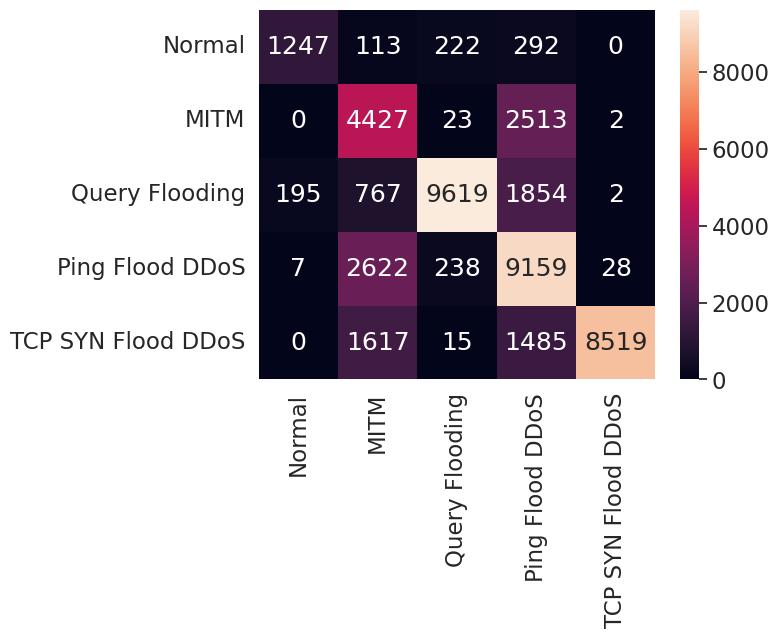

In [ ]:
sns.set(font_scale=1.5)
df_cm = pd.DataFrame(cm, index = target_names,
                  columns = target_names)
plt.figure()
sns.heatmap(df_cm, annot=True, fmt='d')

MITM binary değerlendirme

In [50]:
df_mitm = df_min_max_scaled[(df_min_max_scaled['Status'] == 0) | (df_min_max_scaled['Status'] == 1)].copy()

In [51]:
df_mitm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44137 entries, 0 to 224825
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Port A         44137 non-null  float64
 1   Port B         44137 non-null  float64
 2   Packets        44137 non-null  float64
 3   Bytes          44137 non-null  float64
 4   Packets A → B  44137 non-null  float64
 5   Bytes A → B    44137 non-null  float64
 6   Packets B → A  44137 non-null  float64
 7   Bytes B → A    44137 non-null  float64
 8   Rel Start      44137 non-null  float64
 9   Duration       44137 non-null  float64
 10  Bits/s A → B   44137 non-null  float64
 11  Bits/s B → A   44137 non-null  float64
 12  Status         44137 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 4.7 MB


In [52]:
df_mitm.head()

,Port A,Port B,Packets,Bytes,Packets A → B,Bytes A → B,Packets B → A,Bytes B → A,Rel Start,Duration,Bits/s A → B,Bits/s B → A,Status
0,0.756359,0.008385,0.043991,0.043986,0.044006,0.044002,0.043960,0.043961,0.000000e+00,2.569858e-08,0.394654,0.002658,0
1,0.007353,0.865225,0.000059,0.000050,0.000042,0.000040,0.000092,0.000065,4.799358e-10,2.356269e-08,0.004281,0.004269,0
2,0.802464,0.008385,0.000013,0.000011,0.000004,0.000004,0.000031,0.000022,7.604507e-18,2.895457e-19,0.058060,0.115804,0
3,0.802480,0.008385,0.000061,0.000052,0.000061,0.000058,0.000061,0.000044,2.940680e-11,2.099388e-01,0.068065,0.323423,0
4,0.802495,0.008385,0.000061,0.000052,0.000061,0.000058,0.000061,0.000044,7.300549e-11,2.099429e-01,0.068063,0.323417,0


In [53]:
# Hedef sütunu ayırma
X = df_mitm.iloc[:, :-1]
y = df_mitm.iloc[:, -1]

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=59)

# Model oluşturma
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Modeli derleme
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Özeti
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               6656      
                                                                 
 dense_25 (Dense)            (None, 512)               262656    
                                                                 
 dense_26 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 270,338
Trainable params: 270,338
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Modeli eğitme
history = model.fit(X_train, y_train, epochs=25, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/25
276/276 [==============================] - 2s 4ms/step - loss: 0.3883 - accuracy: 0.8557 - val_loss: 0.2025 - val_accuracy: 0.9642
Epoch 2/25
276/276 [==============================] - 1s 4ms/step - loss: 0.2002 - accuracy: 0.9632 - val_loss: 0.1870 - val_accuracy: 0.9650
Epoch 3/25
276/276 [==============================] - 1s 4ms/step - loss: 0.1947 - accuracy: 0.9634 - val_loss: 0.1851 - val_accuracy: 0.9647
Epoch 4/25
276/276 [==============================] - 1s 4ms/step - loss: 0.1887 - accuracy: 0.9634 - val_loss: 0.1782 - val_accuracy: 0.9651
Epoch 5/25
276/276 [==============================] - 1s 4ms/step - loss: 0.1842 - accuracy: 0.9634 - val_loss: 0.1729 - val_accuracy: 0.9651
Epoch 6/25
276/276 [==============================] - 2s 5ms/step - loss: 0.1780 - accuracy: 0.9636 - val_loss: 0.1660 - val_accuracy: 0.9652
Epoch 7/25
276/276 [==============================] - 2s 6ms/step - loss: 0.1721 - accuracy: 0.9636 - val_loss: 0.1707 - val_accuracy: 0.9652
Epoch 

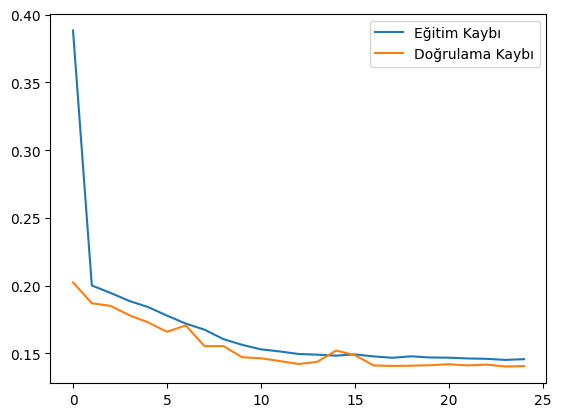

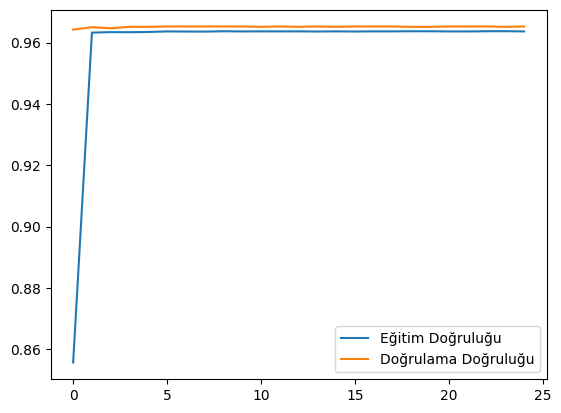

In [55]:
# Eğitim kaybı ve doğruluğu
train_loss = history.history['loss']
train_acc = history.history['accuracy']

# Doğrulama kaybı ve doğruluğu
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Kayıp grafiği
plt.plot(train_loss, label='Eğitim Kaybı')
plt.plot(val_loss, label='Doğrulama Kaybı')
plt.legend()
plt.show()

# Doğruluk grafiği
plt.plot(train_acc, label='Eğitim Doğruluğu')
plt.plot(val_acc, label='Doğrulama Doğruluğu')
plt.legend()
plt.show()

In [56]:
# Modeli değerlendirme
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


276/276 [==============================] - 1s 2ms/step - loss: 0.1407 - accuracy: 0.9652
Test loss: 0.1407235711812973
Test accuracy: 0.9652242660522461


In [57]:
# Model Eğitim Detayı Precision Recall F1-Score
from sklearn.metrics import classification_report

# Test verileri üzerinde tahmin yapma
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Sınıflandırma raporu
target_names = ['Normal', 'MITM'] # sınıf isimleri
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))

276/276 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

      Normal       1.00      0.83      0.91      1860
        MITM       0.96      1.00      0.98      6968

    accuracy                           0.97      8828
   macro avg       0.98      0.92      0.94      8828
weighted avg       0.97      0.97      0.96      8828



In [58]:
# Karmaşıklık Matrisi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred) # y_test kategorik olarak dönüştürülmüştü, tekrar tek sütün haline getirdik.
print(cm)

[[1553  307]
 [   0 6968]]


Query Flooding binary Eğitim

In [59]:
df_qf = df_min_max_scaled[(df_min_max_scaled['Status'] == 0) | (df_min_max_scaled['Status'] == 2)].copy()

In [60]:
# Hedef sütunu ayırma
X = df_qf.iloc[:, :-1]
y = df_qf.iloc[:, -1]

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=59)

# Model oluşturma
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Modeli derleme
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Özeti
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 512)               6656      
                                                                 
 dense_28 (Dense)            (None, 512)               262656    
                                                                 
 dense_29 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 270,851
Trainable params: 270,851
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Modeli eğitme
history = model.fit(X_train, y_train, epochs=25, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/25
443/443 [==============================] - 4s 6ms/step - loss: 0.1927 - accuracy: 0.9021 - val_loss: 0.1440 - val_accuracy: 0.9333
Epoch 2/25
443/443 [==============================] - 2s 4ms/step - loss: 0.1476 - accuracy: 0.9273 - val_loss: 0.1451 - val_accuracy: 0.9256
Epoch 3/25
443/443 [==============================] - 2s 4ms/step - loss: 0.1394 - accuracy: 0.9304 - val_loss: 0.1236 - val_accuracy: 0.9423
Epoch 4/25
443/443 [==============================] - 2s 4ms/step - loss: 0.1181 - accuracy: 0.9373 - val_loss: 0.1050 - val_accuracy: 0.9435
Epoch 5/25
443/443 [==============================] - 2s 4ms/step - loss: 0.1024 - accuracy: 0.9383 - val_loss: 0.0904 - val_accuracy: 0.9462
Epoch 6/25
443/443 [==============================] - 2s 4ms/step - loss: 0.0927 - accuracy: 0.9418 - val_loss: 0.0821 - val_accuracy: 0.9485
Epoch 7/25
443/443 [==============================] - 2s 4ms/step - loss: 0.0864 - accuracy: 0.9444 - val_loss: 0.0792 - val_accuracy: 0.9475
Epoch 

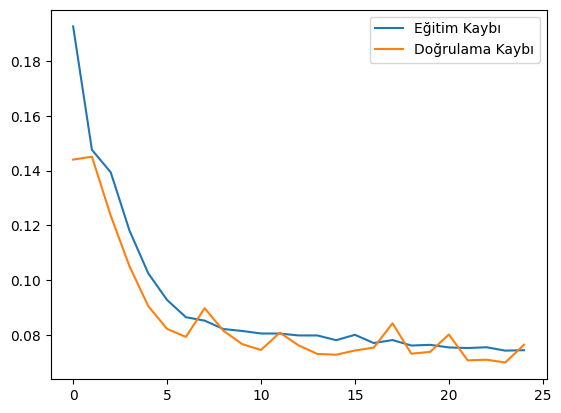

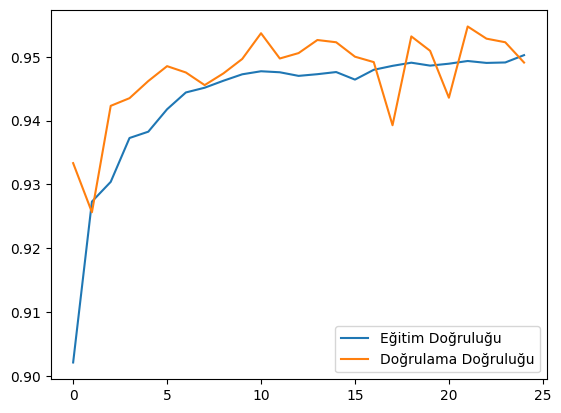

In [62]:
# Eğitim kaybı ve doğruluğu
train_loss = history.history['loss']
train_acc = history.history['accuracy']

# Doğrulama kaybı ve doğruluğu
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Kayıp grafiği
plt.plot(train_loss, label='Eğitim Kaybı')
plt.plot(val_loss, label='Doğrulama Kaybı')
plt.legend()
plt.show()

# Doğruluk grafiği
plt.plot(train_acc, label='Eğitim Doğruluğu')
plt.plot(val_acc, label='Doğrulama Doğruluğu')
plt.legend()
plt.show()

In [63]:
# Modeli değerlendirme
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

443/443 [==============================] - 2s 4ms/step - loss: 0.0763 - accuracy: 0.9491
Test loss: 0.07633954286575317
Test accuracy: 0.9490818977355957


In [64]:
# Model Eğitim Detayı Precision Recall F1-Score
from sklearn.metrics import classification_report

# Test verileri üzerinde tahmin yapma
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Sınıflandırma raporu
target_names = ['Normal', 'Query Flooding'] # sınıf isimleri
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))

443/443 [==============================] - 1s 2ms/step
                precision    recall  f1-score   support

        Normal       0.86      0.74      0.80      1919
Query Flooding       0.96      0.98      0.97     12241

      accuracy                           0.95     14160
     macro avg       0.91      0.86      0.88     14160
  weighted avg       0.95      0.95      0.95     14160



In [65]:
# Karmaşıklık Matrisi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred) # y_test kategorik olarak dönüştürülmüştü, tekrar tek sütün haline getirdik.
print(cm)

[[ 1428   491]
 [  230 12011]]


Ping Flood DDoS binary eğitim

In [66]:
df_pf = df_min_max_scaled[(df_min_max_scaled['Status'] == 0) | (df_min_max_scaled['Status'] == 3)].copy()

In [67]:
# Hedef sütunu ayırma
X = df_pf.iloc[:, :-1]
y = df_pf.iloc[:, -1]

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=59)

# Model oluşturma
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Modeli derleme
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Özeti
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 512)               6656      
                                                                 
 dense_31 (Dense)            (None, 512)               262656    
                                                                 
 dense_32 (Dense)            (None, 4)                 2052      
                                                                 
Total params: 271,364
Trainable params: 271,364
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Modeli eğitme
history = model.fit(X_train, y_train, epochs=25, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/25
436/436 [==============================] - 3s 5ms/step - loss: 0.1451 - accuracy: 0.9120 - val_loss: 0.1008 - val_accuracy: 0.9547
Epoch 2/25
436/436 [==============================] - 2s 4ms/step - loss: 0.1038 - accuracy: 0.9488 - val_loss: 0.1009 - val_accuracy: 0.9512
Epoch 3/25
436/436 [==============================] - 2s 4ms/step - loss: 0.1023 - accuracy: 0.9514 - val_loss: 0.0980 - val_accuracy: 0.9560
Epoch 4/25
436/436 [==============================] - 2s 5ms/step - loss: 0.0951 - accuracy: 0.9531 - val_loss: 0.0842 - val_accuracy: 0.9586
Epoch 5/25
436/436 [==============================] - 3s 7ms/step - loss: 0.0825 - accuracy: 0.9540 - val_loss: 0.0729 - val_accuracy: 0.9586
Epoch 6/25
436/436 [==============================] - 3s 6ms/step - loss: 0.0751 - accuracy: 0.9555 - val_loss: 0.0674 - val_accuracy: 0.9591
Epoch 7/25
436/436 [==============================] - 2s 5ms/step - loss: 0.0723 - accuracy: 0.9557 - val_loss: 0.0673 - val_accuracy: 0.9590
Epoch 

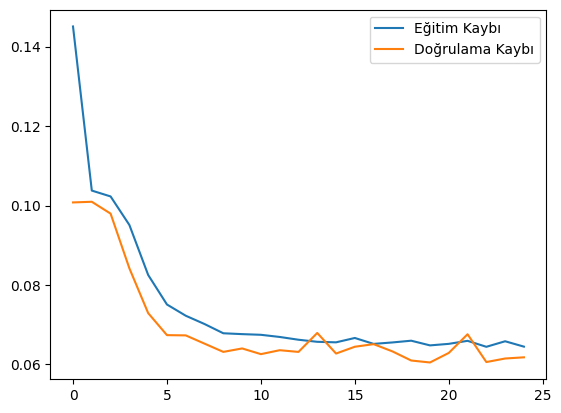

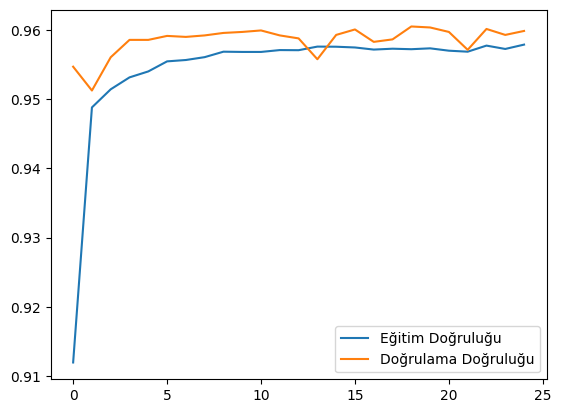

In [69]:
# Eğitim kaybı ve doğruluğu
train_loss = history.history['loss']
train_acc = history.history['accuracy']

# Doğrulama kaybı ve doğruluğu
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Kayıp grafiği
plt.plot(train_loss, label='Eğitim Kaybı')
plt.plot(val_loss, label='Doğrulama Kaybı')
plt.legend()
plt.show()

# Doğruluk grafiği
plt.plot(train_acc, label='Eğitim Doğruluğu')
plt.plot(val_acc, label='Doğrulama Doğruluğu')
plt.legend()
plt.show()

In [70]:
# Modeli değerlendirme
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

436/436 [==============================] - 1s 3ms/step - loss: 0.0618 - accuracy: 0.9598
Test loss: 0.06178288161754608
Test accuracy: 0.9598479866981506


In [72]:
# Model Eğitim Detayı Precision Recall F1-Score
from sklearn.metrics import classification_report

# Test verileri üzerinde tahmin yapma
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Sınıflandırma raporu
target_names = ['Normal', 'Ping Flood DDoS'] # sınıf isimleri
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))

436/436 [==============================] - 1s 2ms/step
                 precision    recall  f1-score   support

         Normal       0.97      0.73      0.83      1906
Ping Flood DDoS       0.96      1.00      0.98     12041

       accuracy                           0.96     13947
      macro avg       0.97      0.86      0.90     13947
   weighted avg       0.96      0.96      0.96     13947



In [73]:
# Karmaşıklık Matrisi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred) # y_test kategorik olarak dönüştürülmüştü, tekrar tek sütün haline getirdik.
print(cm)

[[ 1385   521]
 [   39 12002]]


TCP SYN Flood binary eğitim

In [77]:
df_tsf = df_min_max_scaled[(df_min_max_scaled['Status'] == 0) | (df_min_max_scaled['Status'] == 4)].copy()

In [78]:
# Hedef sütunu ayırma
X = df_tsf.iloc[:, :-1]
y = df_tsf.iloc[:, -1]

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=59)

# Model oluşturma
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Modeli derleme
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Özeti
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 512)               6656      
                                                                 
 dense_37 (Dense)            (None, 512)               262656    
                                                                 
 dense_38 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 271,877
Trainable params: 271,877
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Modeli eğitme
history = model.fit(X_train, y_train, epochs=25, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/25
426/426 [==============================] - 4s 5ms/step - loss: 0.0854 - accuracy: 0.9489 - val_loss: 0.0372 - val_accuracy: 0.9792
Epoch 2/25
426/426 [==============================] - 2s 4ms/step - loss: 0.0406 - accuracy: 0.9748 - val_loss: 0.0357 - val_accuracy: 0.9791
Epoch 3/25
426/426 [==============================] - 2s 5ms/step - loss: 0.0403 - accuracy: 0.9748 - val_loss: 0.0390 - val_accuracy: 0.9713
Epoch 4/25
426/426 [==============================] - 3s 7ms/step - loss: 0.0399 - accuracy: 0.9752 - val_loss: 0.0350 - val_accuracy: 0.9789
Epoch 5/25
426/426 [==============================] - 2s 6ms/step - loss: 0.0395 - accuracy: 0.9750 - val_loss: 0.0421 - val_accuracy: 0.9660
Epoch 6/25
426/426 [==============================] - 2s 4ms/step - loss: 0.0381 - accuracy: 0.9755 - val_loss: 0.0332 - val_accuracy: 0.9791
Epoch 7/25
426/426 [==============================] - 2s 5ms/step - loss: 0.0369 - accuracy: 0.9759 - val_loss: 0.0327 - val_accuracy: 0.9791
Epoch 

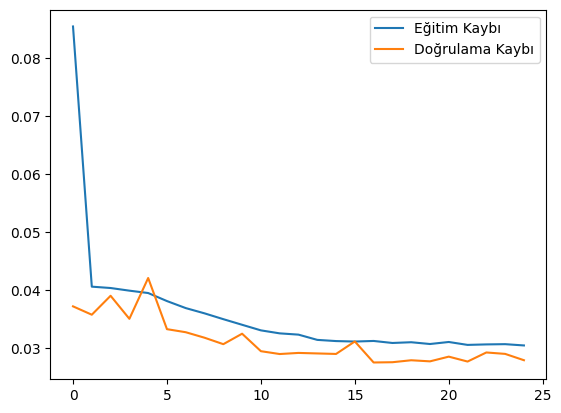

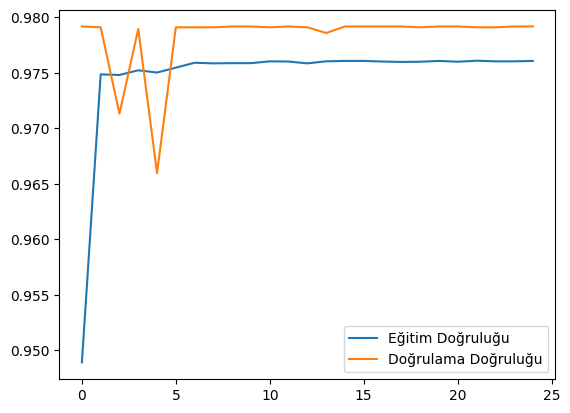

In [80]:
# Eğitim kaybı ve doğruluğu
train_loss = history.history['loss']
train_acc = history.history['accuracy']

# Doğrulama kaybı ve doğruluğu
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Kayıp grafiği
plt.plot(train_loss, label='Eğitim Kaybı')
plt.plot(val_loss, label='Doğrulama Kaybı')
plt.legend()
plt.show()

# Doğruluk grafiği
plt.plot(train_acc, label='Eğitim Doğruluğu')
plt.plot(val_acc, label='Doğrulama Doğruluğu')
plt.legend()
plt.show()

In [81]:
# Modeli değerlendirme
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

426/426 [==============================] - 1s 3ms/step - loss: 0.0279 - accuracy: 0.9792
Test loss: 0.027893563732504845
Test accuracy: 0.9791605472564697


In [82]:
# Model Eğitim Detayı Precision Recall F1-Score
from sklearn.metrics import classification_report

# Test verileri üzerinde tahmin yapma
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Sınıflandırma raporu
target_names = ['Normal', 'TCP SYN Flood DDoS'] # sınıf isimleri
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))

426/426 [==============================] - 1s 2ms/step
                    precision    recall  f1-score   support

            Normal       1.00      0.85      0.92      1880
TCP SYN Flood DDoS       0.98      1.00      0.99     11748

          accuracy                           0.98     13628
         macro avg       0.99      0.92      0.95     13628
      weighted avg       0.98      0.98      0.98     13628



In [83]:
# Karmaşıklık Matrisi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred) # y_test kategorik olarak dönüştürülmüştü, tekrar tek sütün haline getirdik.
print(cm)

[[ 1596   284]
 [    0 11748]]
